In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LinearRegression

In [2]:
column_dtypes = {'sexe': 'uint8',
                 'preusuel': 'object',
                 'annais': 'object',
                 'dpt': 'object',
                 'nombre': 'uint32'}

df = pd.read_csv( 'dpt2017.txt', sep='\t', dtype = column_dtypes)

df = df[df['preusuel'] != '_PRENOMS_RARES']
df.head()

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,28
1,1,AADAM,XXXX,XX,24
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3


In [3]:
# filter out rows with invalid years

extr = df['annais'].str.extract(r'^(\d{4})', expand=False)
df['annais'] = pd.to_numeric(extr)  # downcast='unsigned' not working

df = df.dropna()

df = df[df['annais'] > 1960]

df['annais'] = df['annais'].astype('uint16')

df.head()

# data.to_csv(‘cleanfile.csv’ encoding=’utf-8’)

,sexe,preusuel,annais,dpt,nombre
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
7,1,AARON,1962,75,3
8,1,AARON,1976,75,3
9,1,AARON,1982,75,3


In [4]:
# to_numeric on departments

df['dpt'] = pd.to_numeric(df['dpt']).astype('uint16')


In [5]:
# remove accents in string columns

def normalize(x):
    return x.str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

str_cols = df.select_dtypes(include=[np.object]).columns
df[str_cols] = df[str_cols].apply(normalize)

df.head()

,sexe,preusuel,annais,dpt,nombre
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
7,1,AARON,1962,75,3
8,1,AARON,1976,75,3
9,1,AARON,1982,75,3


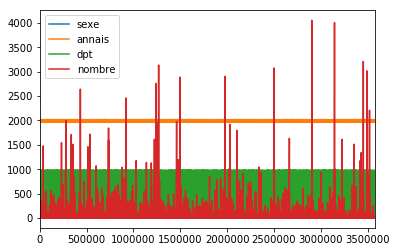

In [39]:
# TODO filter where dpt or annais is not a number

df.describe()

In [16]:
df.dtypes

sexe         uint8
preusuel    object
annais      uint16
dpt         uint16
nombre      uint32
dtype: object

In [20]:
df['preusuel'].value_counts()

CAMILLE           6563
JEROME            6044
MARIE             5472
PIERRE            5376
RAPHAEL           5274
CEDRIC            5233
NICOLAS           5227
ANTOINE           5133
ALEXANDRE         5037
JEREMY            5017
MICKAEL           4986
ANGELIQUE         4897
VINCENT           4843
DAVID             4828
THOMAS            4793
PAUL              4763
LAETITIA          4725
SOPHIE            4705
JEAN              4704
SARAH             4691
EMILIE            4657
KEVIN             4649
CLAIRE            4621
GAELLE            4620
SAMUEL            4569
GUILLAUME         4511
JULIEN            4492
GREGORY           4485
MAXIME            4482
MATHIEU           4450
                  ... 
LOUISANE             1
KISHAN               1
YLANNA               1
HONORYNE             1
EDIS                 1
RUSSEL               1
GIULLIAN             1
DEMBO                1
MANECK               1
ENYS                 1
KAYAN                1
SAFIYE               1
MENISSA    

In [9]:
nb_preusuel_df = df.groupby(
    ['sexe', 'preusuel']
).agg(
    {
         'nombre':sum,
         'annais': "mean"
    }
).sort_values(by='nombre', ascending=False)

print("\ntop:")
print(nb_preusuel_df.head(20))

print("\nHELOISE:")
print(nb_preusuel_df.loc[(2, 'HELOISE')].head())

print("\nELOISE:")
print(nb_preusuel_df.loc[(2, 'ELOISE')].head())

print("\nNATHAN:")
print(nb_preusuel_df.loc[(1, 'NATHAN')].head())

print("\nFLORIAN:")
print(nb_preusuel_df.loc[(1, 'FLORIAN')].head())


top:
                 nombre       annais
sexe preusuel                       
1    NICOLAS     386471  1988.034437
2    NATHALIE    369125  1978.874926
1    CHRISTOPHE  359553  1981.372265
2    MARIE       341927  1988.550065
     ISABELLE    312016  1979.807102
1    DAVID       305369  1987.836993
     PHILIPPE    301466  1980.475849
     SEBASTIEN   298747  1986.854879
     STEPHANE    293334  1981.793501
     FREDERIC    291134  1980.781690
     JULIEN      288518  1991.477070
     LAURENT     288323  1980.725193
     THOMAS      270427  1992.384969
2    SYLVIE      262840  1976.056683
1    ERIC        261504  1980.099353
     ALEXANDRE   261157  1990.594600
     OLIVIER     250592  1983.078625
2    VALERIE     244855  1976.858710
     SANDRINE    238148  1979.008189
     STEPHANIE   232052  1982.867651

HELOISE:
nombre    19387.000000
annais     2000.128182
Name: (2, HELOISE), dtype: float64

ELOISE:
nombre    26982.000000
annais     2001.147427
Name: (2, ELOISE), dtype: float64


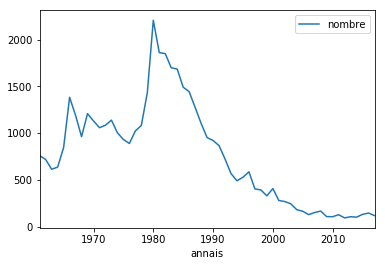

In [38]:
df[
    df['preusuel'] == 'PHILIPPE'
].groupby(
    'annais'
).agg(
    { 'nombre':sum } 
).sort_values(
    by='annais', ascending=False
).plot()

#plt.hist( nb_preusuel_df.nombre )

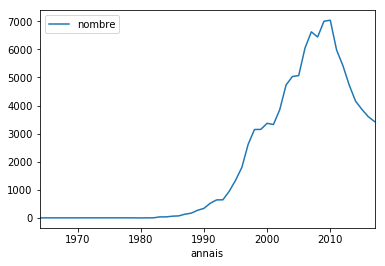

In [34]:
df[
    df['preusuel'] == 'NATHAN'
].groupby(
    'annais'
).agg(
    { 'nombre':sum } 
).sort_values(
    by='annais', ascending=False
).plot()